# MMM Model for Incrementality Testing 

Author: Joshua Chan

Date: 11/18/2025

## Data Imports and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

silver_df = pd.read_csv('Silver_Data.csv')

## EDA

In [ ]:
# Exploring data quality
print(len(silver_df))
silver_df.info()

# Looks like we have missing values among Network_TV_Spend, Cable_TV_Spend, Digital_Spend, True_Viewership, Revenue. We will impute these later on.         
silver_df.isna().any()

# Cast air date as datetime type
silver_df["Air_Date"] = pd.to_datetime(silver_df["Air_Date"])

3143
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3143 non-null   int64  
 1   Show              3143 non-null   object 
 2   Season            3143 non-null   int64  
 3   Air_Date          3143 non-null   object 
 4   Week_Number       3143 non-null   int64  
 5   Episode_Number    3143 non-null   int64  
 6   Episode_Type      3143 non-null   object 
 7   Network_TV_Spend  3110 non-null   float64
 8   Cable_TV_Spend    3112 non-null   float64
 9   Digital_Spend     3109 non-null   float64
 10  Impressions       3143 non-null   int64  
 11  True_Viewership   3111 non-null   float64
 12  Revenue           3109 non-null   float64
 13  Holiday           3143 non-null   int64  
 14  LeadIn_Bonus      3143 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 368.4+ KB


In [5]:
# Documentation claims one episode per week per show. Is this accurate?
shows = (silver_df.groupby(["Show", "Week_Number"], as_index=False).agg(num_episodes=("Episode_Number", "nunique")))
shows['num_episodes'].nunique()
    # yes, all 1

1

In [6]:
# Do prelaunch epsiode types always have Episode_Num = 0?
silver_df[silver_df['Episode_Type'] == 'PreLaunch']['Episode_Number'].nunique()
    # yes, all 0

1

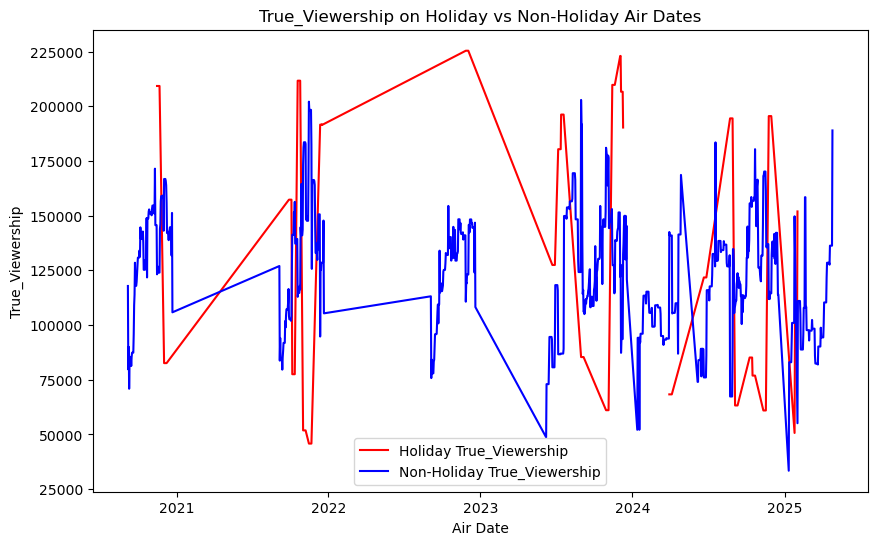

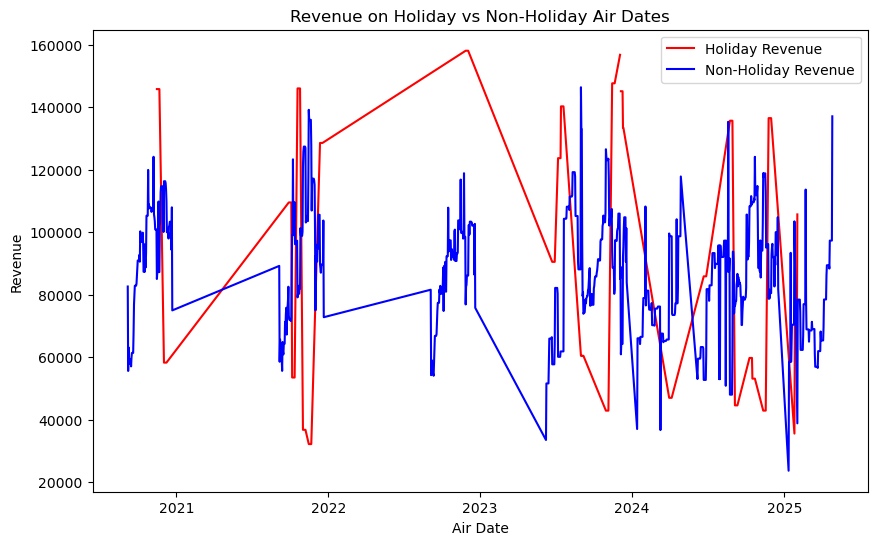

Holiday metrics
131507.93860113854
92083.81745941559
Non-Holiday metrics
123198.03737254471
86499.69790839063


In [7]:
# What are some patterns on holiday air dates vs non holidays?
holidays = silver_df[silver_df["Holiday"] == 1]
non_holidays = silver_df[silver_df["Holiday"] == 0] 

holiday_metrics = holidays.groupby("Air_Date")[["True_Viewership", "Revenue"]].mean().reset_index()
nonholiday_metrics = non_holidays.groupby("Air_Date")[["True_Viewership", "Revenue"]].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(holiday_metrics["Air_Date"], holiday_metrics["True_Viewership"], label="Holiday True_Viewership", color="red")
plt.plot(nonholiday_metrics["Air_Date"], nonholiday_metrics["True_Viewership"], label="Non-Holiday True_Viewership", color="blue")
plt.title("True_Viewership on Holiday vs Non-Holiday Air Dates")
plt.xlabel("Air Date")
plt.ylabel("True_Viewership")
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(holiday_metrics["Air_Date"], holiday_metrics["Revenue"], label="Holiday Revenue", color="red")
plt.plot(nonholiday_metrics["Air_Date"], nonholiday_metrics["Revenue"], label="Non-Holiday Revenue", color="blue")
plt.title("Revenue on Holiday vs Non-Holiday Air Dates")
plt.xlabel("Air Date")
plt.ylabel("Revenue")
plt.legend()
plt.show()

# What are some summary statistics about holidays vs non
print('Holiday metrics')
print(holiday_metrics["True_Viewership"].mean())
print(holiday_metrics["Revenue"].mean())

print('Non-Holiday metrics')
print(nonholiday_metrics["True_Viewership"].mean())
print(nonholiday_metrics["Revenue"].mean())

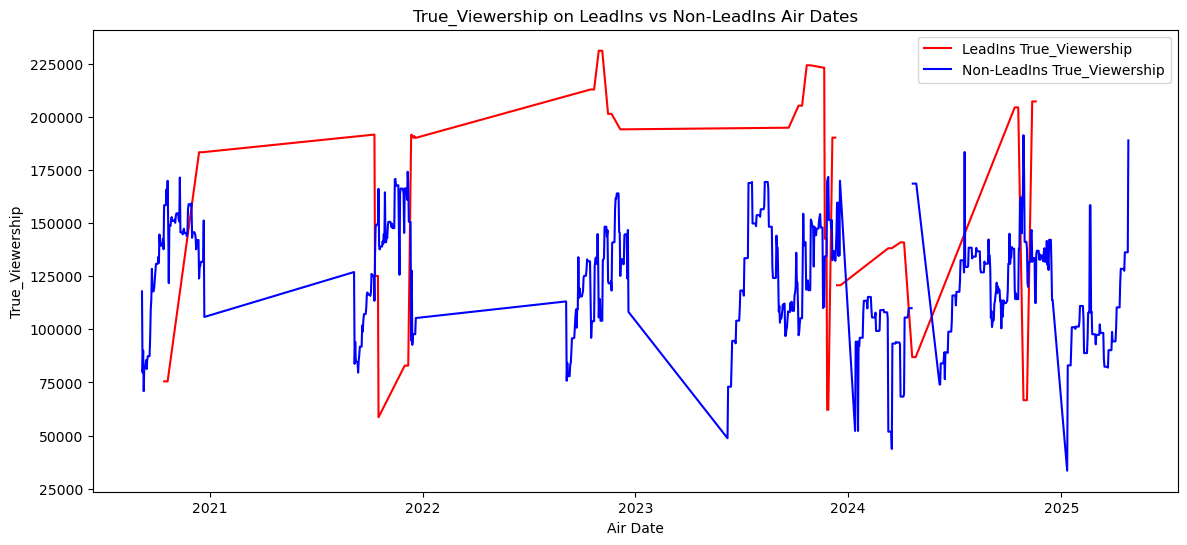

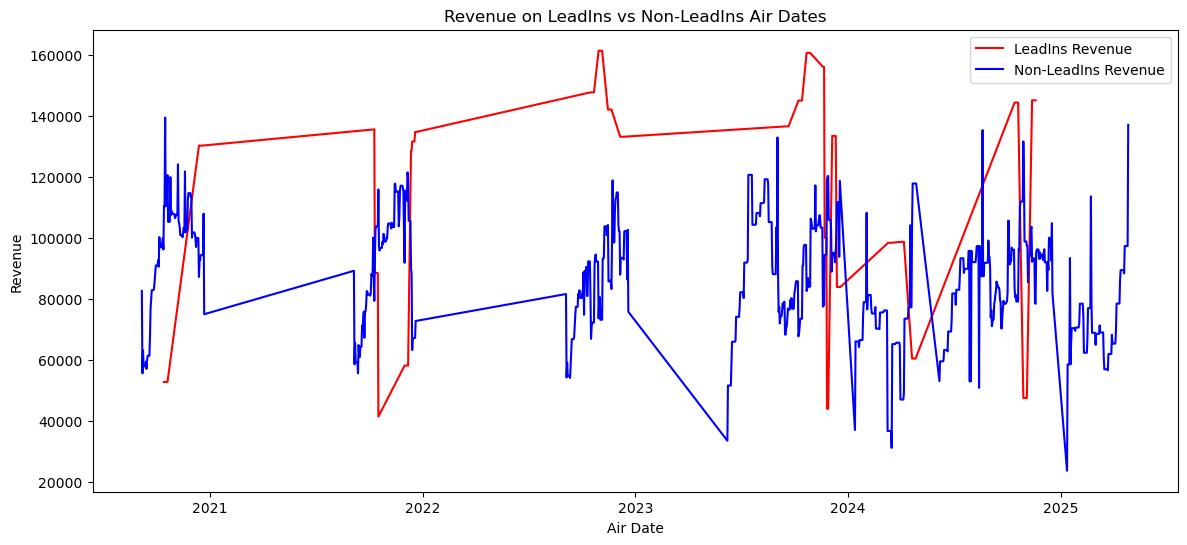

Lead In metrics
162410.43197772157
114046.39575630253
Non-Lead In metrics
122679.31287923321
86134.18238436844


In [84]:
# What are some spending patterns on lead in air dates vs non lead in days?
leadins = silver_df[silver_df["LeadIn_Bonus"] == 1]
non_leadins = silver_df[silver_df["LeadIn_Bonus"] == 0] 

leadins_metrics = leadins.groupby("Air_Date")[["True_Viewership", "Revenue"]].mean().reset_index()
non_leadins_metrics = non_leadins.groupby("Air_Date")[["True_Viewership", "Revenue"]].mean().reset_index()

plt.figure(figsize=(14,6))
plt.plot(leadins_metrics["Air_Date"], leadins_metrics["True_Viewership"], label="LeadIns True_Viewership", color="red")
plt.plot(non_leadins_metrics["Air_Date"], non_leadins_metrics["True_Viewership"], label="Non-LeadIns True_Viewership", color="blue")
plt.title("True_Viewership on LeadIns vs Non-LeadIns Air Dates")
plt.xlabel("Air Date")
plt.ylabel("True_Viewership")
plt.legend()
plt.show()

plt.figure(figsize=(14,6))
plt.plot(leadins_metrics["Air_Date"], leadins_metrics["Revenue"], label="LeadIns Revenue", color="red")
plt.plot(non_leadins_metrics["Air_Date"], non_leadins_metrics["Revenue"], label="Non-LeadIns Revenue", color="blue")
plt.title("Revenue on LeadIns vs Non-LeadIns Air Dates")
plt.xlabel("Air Date")
plt.ylabel("Revenue")
plt.legend()
plt.show()

# What are some summary statistics about holidays vs non
print('Lead In metrics')
print(leadins_metrics["True_Viewership"].mean())
print(leadins_metrics["Revenue"].mean())

print('Non-Lead In metrics')
print(non_leadins_metrics["True_Viewership"].mean())
print(non_leadins_metrics["Revenue"].mean())

Holidays and episodes with Lead-Ins tend to display higher average viewership/revenue generated

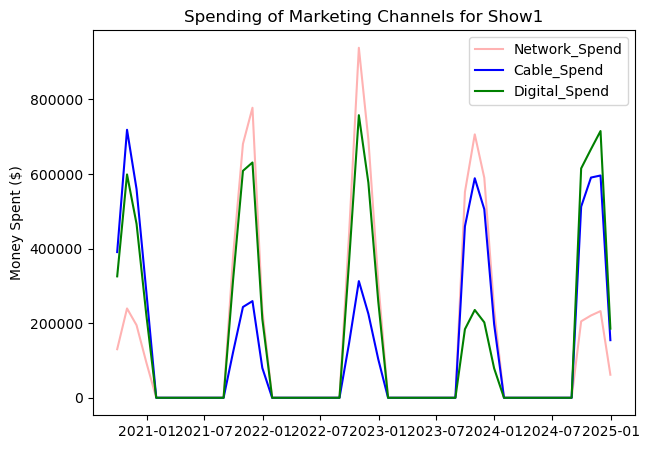

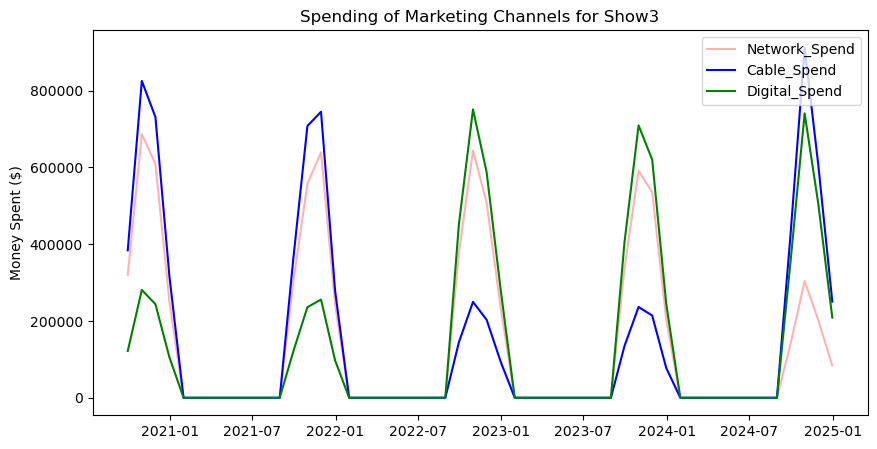

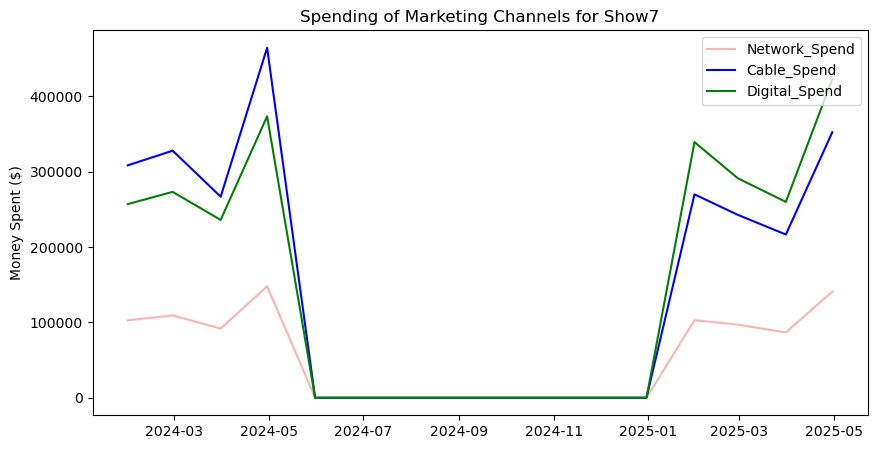

In [ ]:
# Visualizing varaible distributions of spending channels over time for a few specific shows
spend_cols = ["Network_TV_Spend", "Cable_TV_Spend", "Digital_Spend"]
grouped_shows = silver_df.groupby(["Show", "Week_Number", "Episode_Number", "Air_Date"], as_index=False)[spend_cols].sum()

# show1
show1 = grouped_shows[grouped_shows["Show"] == 'Show1']
show1_month = show1.groupby(pd.Grouper(key = "Air_Date", freq = "1M")).sum(numeric_only=True).reset_index()
fig = plt.figure(figsize = (10,5))
plt.plot(show1_month["Air_Date"],show1_month['Network_TV_Spend'], color = "red",alpha = 0.3, label = "Network_Spend")
plt.plot(show1_month["Air_Date"],show1_month['Cable_TV_Spend'], color = "blue", label = "Cable_Spend")
plt.plot(show1_month["Air_Date"],show1_month['Digital_Spend'], color = "green", label = "Digital_Spend")
plt.title("Spending of Marketing Channels for Show1")
plt.ylabel("Money Spent ($)")
plt.legend(loc = 'upper right')
plt.show()

# show3
show3 = grouped_shows[grouped_shows["Show"] == 'Show3']
show3_month = show3.groupby(pd.Grouper(key = "Air_Date", freq = "1M")).sum(numeric_only=True).reset_index()
fig = plt.figure(figsize = (10,5))
plt.plot(show3_month["Air_Date"],show3_month['Network_TV_Spend'], color = "red",alpha = 0.3, label = "Network_Spend")
plt.plot(show3_month["Air_Date"],show3_month['Cable_TV_Spend'], color = "blue", label = "Cable_Spend")
plt.plot(show3_month["Air_Date"],show3_month['Digital_Spend'], color = "green", label = "Digital_Spend")
plt.title("Spending of Marketing Channels for Show3")
plt.ylabel("Money Spent ($)")
plt.legend(loc = 'upper right')
plt.show()

# show7
show7 = grouped_shows[grouped_shows["Show"] == 'Show7']
show7_month = show7.groupby(pd.Grouper(key = "Air_Date", freq = "1M")).sum(numeric_only=True).reset_index()
fig = plt.figure(figsize = (10,5))
plt.plot(show7_month["Air_Date"],show7_month['Network_TV_Spend'], color = "red",alpha = 0.3, label = "Network_Spend")
plt.plot(show7_month["Air_Date"],show7_month['Cable_TV_Spend'], color = "blue", label = "Cable_Spend")
plt.plot(show7_month["Air_Date"],show7_month['Digital_Spend'], color = "green", label = "Digital_Spend")
plt.title("Spending of Marketing Channels for Show7")
plt.ylabel("Money Spent ($)")
plt.legend(loc = 'upper right')
plt.show()

Spend across the 3 different channels differs per show across time. For shows 1 and 3, there appear to be spikes in spending prior to when new episodes are released, then periods of downtime in between seasons. Show 7 is an interesting case since new episodes continually air in 2024 up until April, then the show takes a break until 2025. Let's draw the same distributions on a season level to see which seasons generate the most marketing spend.

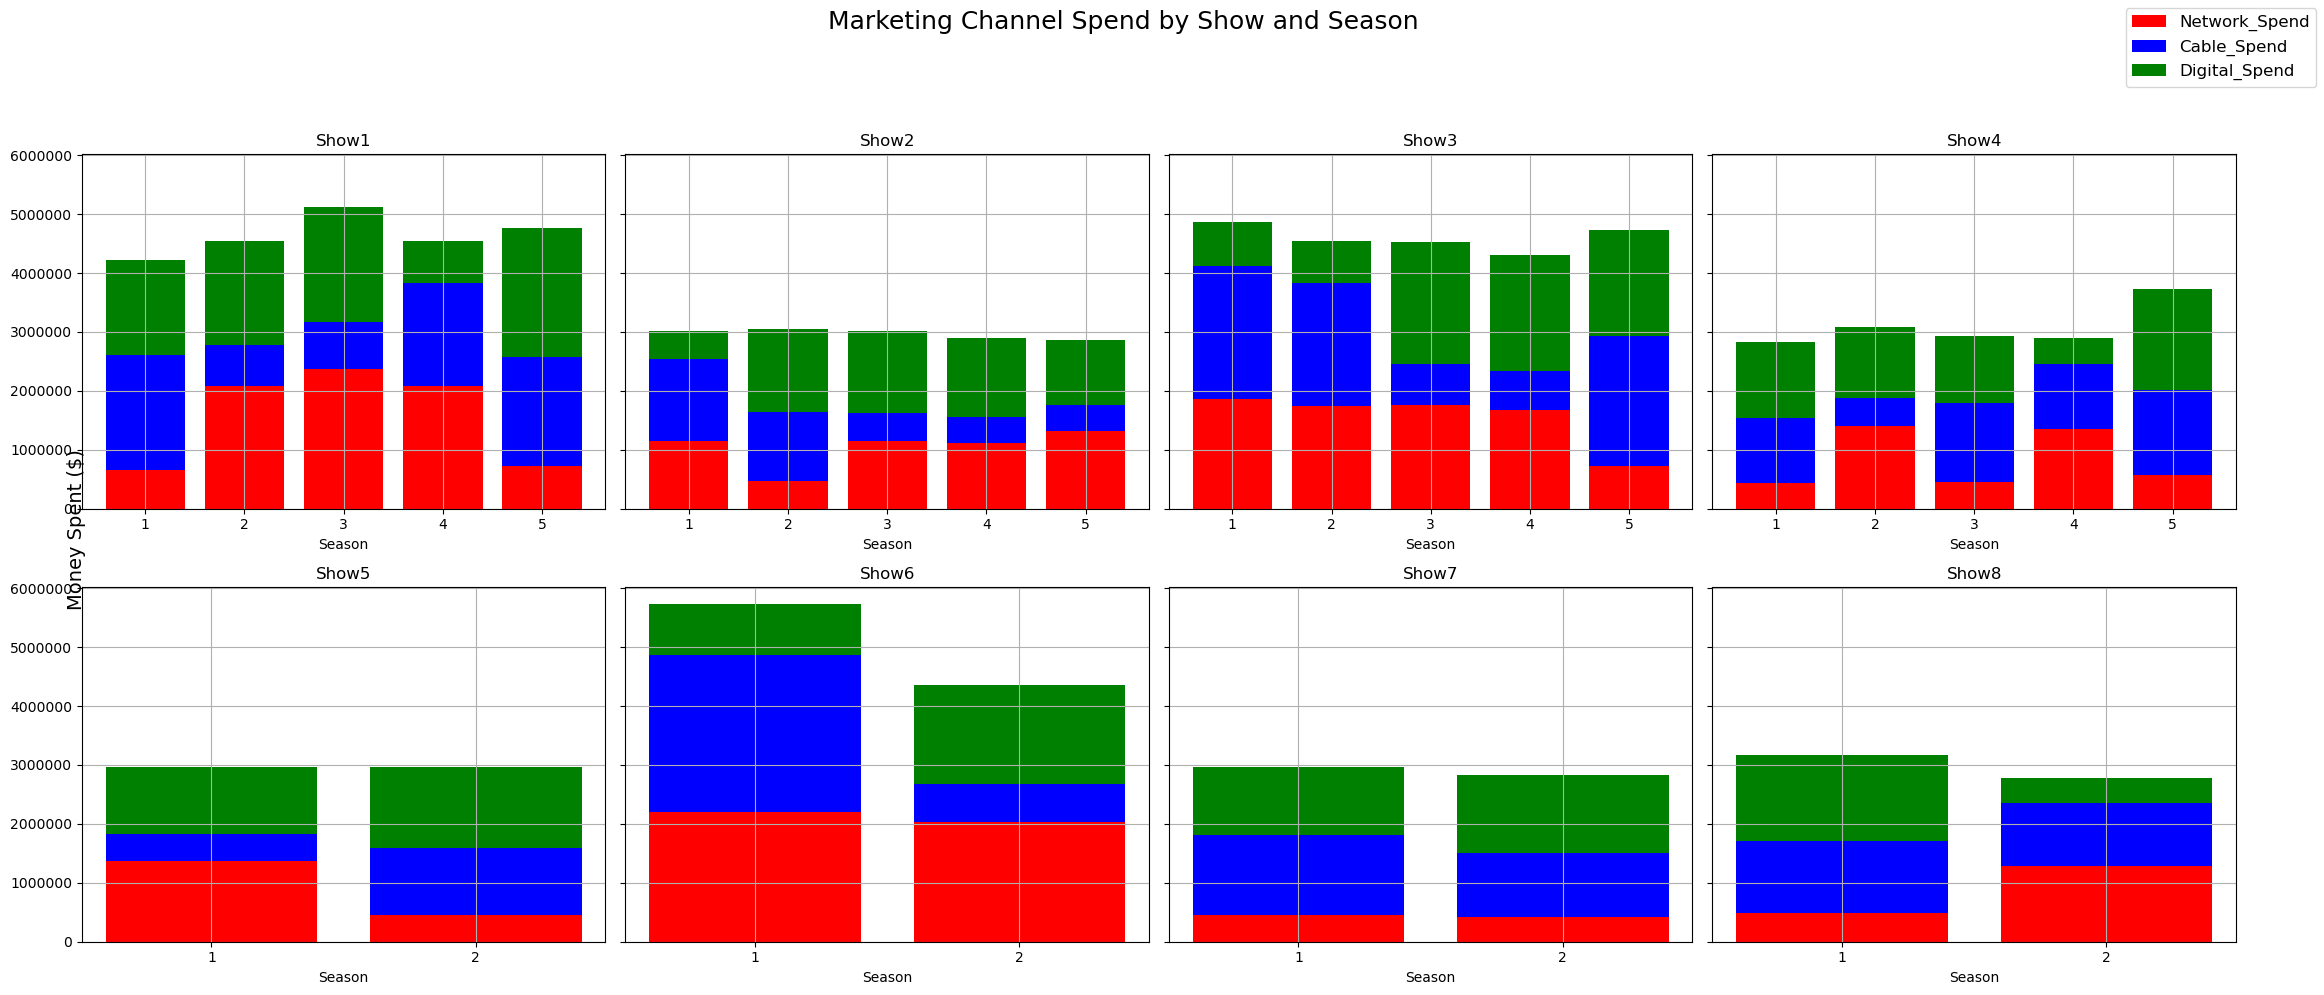

In [ ]:
# Visualization by season
spend_cols = ["Network_TV_Spend", "Cable_TV_Spend", "Digital_Spend"]
grouped_season = silver_df.groupby(["Show", "Season"], as_index=False)[spend_cols].sum()
grouped_season["Season"] = grouped_season["Season"].astype(str)

# Create loop to display figure with subplots for each show/season combo
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 10), sharey=True)
axes = axes.flatten()

for i, show_num in enumerate(range(1, 9)):
    ax = axes[i]
    show = grouped_season[grouped_season["Show"] == f'Show{show_num}']
    ax.bar(show["Season"], show["Network_TV_Spend"], label="Network_Spend", color="red")
    ax.bar(show["Season"], show["Cable_TV_Spend"], bottom=show["Network_TV_Spend"], label="Cable_Spend", color="blue")
    ax.bar(show["Season"], show["Digital_Spend"], bottom=show["Network_TV_Spend"] + show["Cable_TV_Spend"], label="Digital_Spend", color="green")
    ax.set_title(f"Show{show_num}")
    ax.set_xlabel("Season")
    ax.grid(True)
    ax.yaxis.get_major_formatter().set_scientific(False)

fig.text(0.06, 0.5, 'Money Spent ($)', va='center', rotation='vertical', fontsize=14)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=12)
fig.suptitle("Marketing Channel Spend by Show and Season", fontsize=18, y=1.02)
plt.tight_layout(rect=[0.03, 0.03, 0.97, 0.95])
plt.show()

Across all the shows, total spend across the 3 marketing channels seems to stay reasonably constant.

## Data Cleaning to Produce Gold

In [3]:
# Checking for duplicate values (without id col)
dupe_subset = [col for col in silver_df.columns if col != "Unnamed: 0"]
full_dupes = silver_df.duplicated(subset=dupe_subset, keep=False).sum()
print(full_dupes)
    # 367 full dupe rows without the id

# Lets remove these from our population. Given the parameters of the data, one episode per week per show shouldn't have multiple spending rows  
silver_df_dedupe = silver_df.drop_duplicates(subset = dupe_subset, keep='first')
print(len(silver_df_dedupe))

367
2956


We identified 367 dupes and kept one copy of each dupe row to have a total of 2956 rows

In [4]:
# Imputting missing values (157 rows identified)
silver_df_dedupe_impute = silver_df_dedupe
silver_df_dedupe_impute.isna().any()
null_rows = silver_df_dedupe_impute[silver_df_dedupe_impute.isna().any(axis=1)]
null_rows = null_rows.sort_values(by=["Show", "Air_Date"])
null_rows

# Noticing that a lot of missing values will be part of a set.
    # For the 3 spending columns let's impute the spend with the corresponding spend from the same show/season/week/episode if exists.
    # For revenue, the actual revenue per impression varies slightly by show but all average around .70 per impression. I will use the impression col to impute revenue
    # Vice versa for imputting impressoins
rev_calc = silver_df_dedupe_impute["Revenue"] / silver_df_dedupe_impute["True_Viewership"]
avg_ratio = rev_calc.mean()
print(avg_ratio) # .7001

# Spend cols imputation
null_spend_cols = ["Network_TV_Spend", "Cable_TV_Spend", "Digital_Spend"]
silver_df_dedupe_impute[null_spend_cols] = silver_df_dedupe_impute.groupby(["Show", "Season", "Week_Number", "Episode_Number"])[null_spend_cols].transform(lambda x: x.fillna(x.mean()))

# Revenue imputation
silver_df_dedupe_impute["Revenue"] = silver_df_dedupe_impute["Revenue"].fillna(silver_df_dedupe_impute["Impressions"] * 0.70)

#True_Viewership imputation
silver_df_dedupe_impute["True_Viewership"] = silver_df_dedupe_impute["True_Viewership"].fillna(silver_df_dedupe_impute["Revenue"] / 0.70)

# Check remaining nulls. No more now
null_rows = silver_df_dedupe_impute[silver_df_dedupe_impute.isna().any(axis=1)]
null_rows = null_rows.sort_values(by=["Show", "Air_Date"])
null_rows

0.700799533973097


C:\Users\jchan12\AppData\Local\Temp\ipykernel_21632\658701331.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  silver_df_dedupe_impute[null_spend_cols] = silver_df_dedupe_impute.groupby(["Show", "Season", "Week_Number", "Episode_Number"])[null_spend_cols].transform(lambda x: x.fillna(x.mean()))
C:\Users\jchan12\AppData\Local\Temp\ipykernel_21632\658701331.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  silver_df_dedupe_impute["Revenue"] = silver_df_dedupe_impute["Revenue"].fillna(silver_df_dedupe_i

,Unnamed: 0,Show,Season,Air_Date,Week_Number,Episode_Number,Episode_Type,Network_TV_Spend,Cable_TV_Spend,Digital_Spend,Impressions,True_Viewership,Revenue,Holiday,LeadIn_Bonus


In [5]:
# Aggregate daily entries into weekly statistics
silver_df_dedupe_impute_agg = silver_df_dedupe_impute
silver_df_dedupe_impute_agg["Week_Start"] = silver_df_dedupe_impute_agg["Air_Date"].dt.to_period("W").apply(lambda r: r.start_time)
silver_df_dedupe_impute_agg["Show_num"] = silver_df_dedupe_impute_agg["Show"].str[-1].astype(int)

# Dropping unnecessary string columns and categorical variables Holiday, LeanInbonus for numerical weekly aggregates
numeric_cols = ['Network_TV_Spend', 'Cable_TV_Spend', 'Digital_Spend', 'Impressions', 'True_Viewership', 'Revenue']
silver_df_dedupe_impute_agg

silver_df_dedupe_impute_agg = (silver_df_dedupe_impute_agg.groupby(["Week_Start", "Show_num", "Season"], as_index=False)
    .agg({
        **{col: 'sum' for col in numeric_cols},
        'Holiday': 'max',
        'LeadIn_Bonus': 'max'
    })
)
silver_df_dedupe_impute_agg

C:\Users\jchan12\AppData\Local\Temp\ipykernel_21632\18571860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  silver_df_dedupe_impute_agg["Week_Start"] = silver_df_dedupe_impute_agg["Air_Date"].dt.to_period("W").apply(lambda r: r.start_time)
C:\Users\jchan12\AppData\Local\Temp\ipykernel_21632\18571860.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  silver_df_dedupe_impute_agg["Show_num"] = silver_df_dedupe_impute_agg["Show"].str[-1].astype(int)


,Week_Start,Show_num,Season,Network_TV_Spend,Cable_TV_Spend,Digital_Spend,Impressions,True_Viewership,Revenue,Holiday,LeadIn_Bonus
0,2020-08-31,1,1,4028.297704,12084.893113,10070.744261,43639891,1.178564e+05,82590.005714,0,0
1,2020-09-07,1,1,29023.939351,87071.818053,72559.848378,314426005,8.364817e+05,584332.067143,0,0
2,2020-09-07,2,1,96576.088673,115891.306408,38630.435469,495757262,2.910184e+05,199522.050000,0,0
3,2020-09-07,3,1,62584.348929,75101.218715,25033.739572,321266328,6.640309e+05,469030.105714,0,0
4,2020-09-07,4,1,33097.395782,82743.489454,99292.187345,342006420,3.022402e+05,210690.814286,0,0
...,...,...,...,...,...,...,...,...,...,...,...
438,2025-04-07,8,2,108533.245442,90444.371201,36177.748481,470310723,1.118471e+06,793938.238571,0,0
439,2025-04-14,7,2,47288.757713,118221.894283,141866.273140,488650500,5.941332e+05,413254.692857,0,0
440,2025-04-14,8,2,126598.677602,105498.898002,42199.559201,548594274,1.218425e+06,852049.268571,0,0
441,2025-04-21,7,2,34682.313032,86705.782580,104046.939096,358383900,4.180881e+05,287543.035714,0,0


In this dataset, I treated each Show + Season as a “campaign”, and the three spend columns (Network_TV_Spend, Cable_TV_Spend, Digital_Spend) as distinct channels. I then aggregated impressions, revenue, and spend by Show/Season to produce campaign-by-channel totals.

In [6]:
# Sorting dataframe 
gold_df = silver_df_dedupe_impute_agg.sort_values(by=["Show_num", "Season", "Week_Start"])
gold_df.head(10)

,Week_Start,Show_num,Season,Network_TV_Spend,Cable_TV_Spend,Digital_Spend,Impressions,True_Viewership,Revenue,Holiday,LeadIn_Bonus
0,2020-08-31,1,1,4028.297704,12084.893113,10070.744261,43639891,1.178564e+05,8.259001e+04,0,0
1,2020-09-07,1,1,29023.939351,87071.818053,72559.848378,314426005,8.364817e+05,5.843321e+05,0,0
5,2020-09-14,1,1,34495.372115,103486.116345,86238.430288,373699865,9.468941e+05,6.545887e+05,0,0
9,2020-09-21,1,1,39842.041877,119526.125630,99605.104692,431622117,1.208630e+06,8.554157e+05,0,0
13,2020-09-28,1,1,52849.146408,158547.439225,132122.866021,572532416,1.265999e+06,8.779058e+05,0,0
17,2020-10-05,1,1,49825.381878,149476.145635,124563.454696,539774974,1.353176e+06,9.284187e+05,0,0
21,2020-10-12,1,1,51432.972688,154298.918064,128582.431720,557190544,1.423409e+06,9.945825e+05,0,0
25,2020-10-19,1,1,63183.793562,189551.380687,157959.483906,684491098,1.556091e+06,1.111174e+06,0,0
29,2020-10-26,1,1,53275.368988,159826.106964,133188.422470,577149833,1.554496e+06,1.098677e+06,0,0
33,2020-11-02,1,1,54659.713403,163979.140210,136649.283509,592146893,1.557891e+06,1.085091e+06,0,0


In [7]:
# Augmenting columns of gold dataset for campaign metrics
# Total spend across channels
gold_df["Total_Spend"] = (gold_df["Network_TV_Spend"] + gold_df["Cable_TV_Spend"] + gold_df["Digital_Spend"])

# CPM - cost per thousand impressions
gold_df["CPM"] = (gold_df["Total_Spend"] / gold_df["Impressions"] * 1000)

# Revenue per impression
gold_df["Revenue_per_View"] = (gold_df["Revenue"] / gold_df["True_Viewership"])

# Cost Per View
gold_df["Cost_per_View"] = (gold_df["Total_Spend"] / gold_df["True_Viewership"])

gold_df

,Week_Start,Show_num,Season,Network_TV_Spend,Cable_TV_Spend,Digital_Spend,Impressions,True_Viewership,Revenue,Holiday,LeadIn_Bonus,Total_Spend,CPM,Revenue_per_View,Cost_per_View
0,2020-08-31,1,1,4028.297704,12084.893113,10070.744261,43639891,1.178564e+05,82590.005714,0,0,26183.935078,0.6,0.700768,0.222168
1,2020-09-07,1,1,29023.939351,87071.818053,72559.848378,314426005,8.364817e+05,584332.067143,0,0,188655.605782,0.6,0.698559,0.225535
5,2020-09-14,1,1,34495.372115,103486.116345,86238.430288,373699865,9.468941e+05,654588.718571,0,0,224219.918748,0.6,0.691301,0.236795
9,2020-09-21,1,1,39842.041877,119526.125630,99605.104692,431622117,1.208630e+06,855415.732857,0,0,258973.272198,0.6,0.707756,0.214270
13,2020-09-28,1,1,52849.146408,158547.439225,132122.866021,572532416,1.265999e+06,877905.820000,0,0,343519.451654,0.6,0.693449,0.271343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,2025-03-24,8,2,55376.188434,46146.823695,18458.729478,239963485,1.022451e+06,698037.587143,0,0,119981.741608,0.5,0.682710,0.117347
436,2025-03-31,8,2,72107.801166,60089.834305,24035.933722,312467143,9.886399e+05,681364.960000,0,0,156233.569192,0.5,0.689194,0.158029
438,2025-04-07,8,2,108533.245442,90444.371201,36177.748481,470310723,1.118471e+06,793938.238571,0,0,235155.365123,0.5,0.709842,0.210247
440,2025-04-14,8,2,126598.677602,105498.898002,42199.559201,548594274,1.218425e+06,852049.268571,0,0,274297.134805,0.5,0.699304,0.225124


## Bayesian Marketing Mix Modeling Evaluation and Development

A basic MMM equation for this problem is something like this: Revenue(t)= β0​ + β1​⋅NetworkSpend(t)​ + β2​⋅CableSpend(t)​ + β3​⋅DigitalSpend(t)​+ ε(t)​. We want to determine the coefficients and weight that each channel has on predicting revenue in week t, where β0 is our base revenue without the marketing channel spends and ε(t) being extraneous noise like Holidays/LeadIns. We also want to capture Adstock (capturing lag and carryover effects of marketing) and Saturation (diminishing returns of marketing channel spend over time). So now our equation becomes Revenue(t)= β0 + β1⋅f(Adstock_NetworkSpend(t)) + β2⋅f(Adstock_CableSpend(t)) + β3⋅f(Adstock_DigitalSpend(t))+ ε(t) where f(x) is the saturation function. To estimate these parameters, we can opt for regression techniques (Frequentist approaches) or Bayesian. Frequentist struggles when data is noisy/sparse, it's unable to include domain knowledge like prior probabilities, and point estimates for each coefficient oversimplify results. Bayesian approaches are better since they replace single guesses with distributions and quantifies uncertainty of ranges. 

In [ ]:
# Imports
# !pip install pymc-marketing
from pymc_marketing.mmm import MMM, GeometricAdstock, LogisticSaturation
from pymc_marketing.mmm.transformers import geometric_adstock, logistic_saturation
from sklearn.model_selection import train_test_split
from pymc_extras.prior import Prior
import arviz as az
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# Aggregate total spend and revenue on a week by week basis for modeling instead of grouped by show and season
gold_df = gold_df.groupby("Week_Start").agg({"Network_TV_Spend": "sum","Cable_TV_Spend": "sum","Digital_Spend": "sum","LeadIn_Bonus": "max","Holiday": "max","Revenue": "sum"}).reset_index()

# Standardize revenue
scaler = MinMaxScaler()
gold_df['Revenue_norm'] = scaler.fit_transform(gold_df[['Revenue']])

# Train test split
df_train, df_test, y_train, y_test = train_test_split(gold_df.drop(['Revenue', 'Revenue_norm'], axis=1),gold_df['Revenue_norm'],test_size= 0.2,shuffle=False, random_state=42)
spend_var = ["Network_TV_Spend","Cable_TV_Spend","Digital_Spend"]

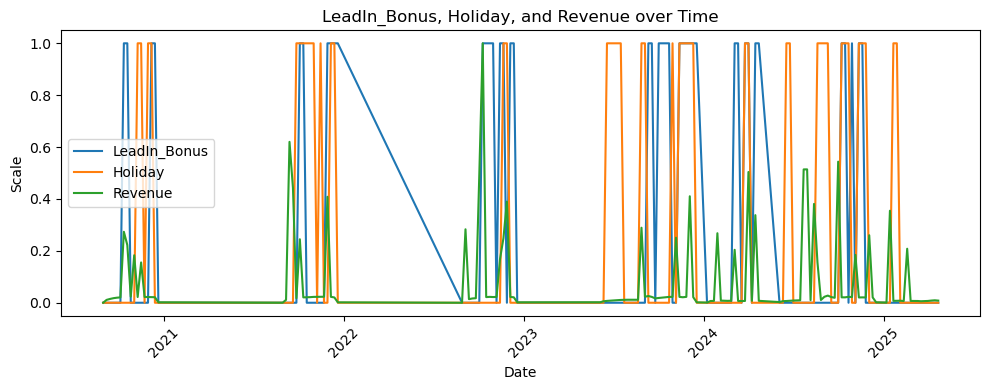

In [10]:
# Plot control (categorical) variables over time of gold_df
plt.figure(figsize=(10, 4))
plt.plot(gold_df["Week_Start"], gold_df["LeadIn_Bonus"], label="LeadIn_Bonus")
plt.plot(gold_df["Week_Start"], gold_df["Holiday"], label="Holiday")
plt.plot(gold_df["Week_Start"], gold_df["Revenue_norm"], label='Revenue')
plt.xlabel("Date")
plt.ylabel("Scale")
plt.title("LeadIn_Bonus, Holiday, and Revenue over Time")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

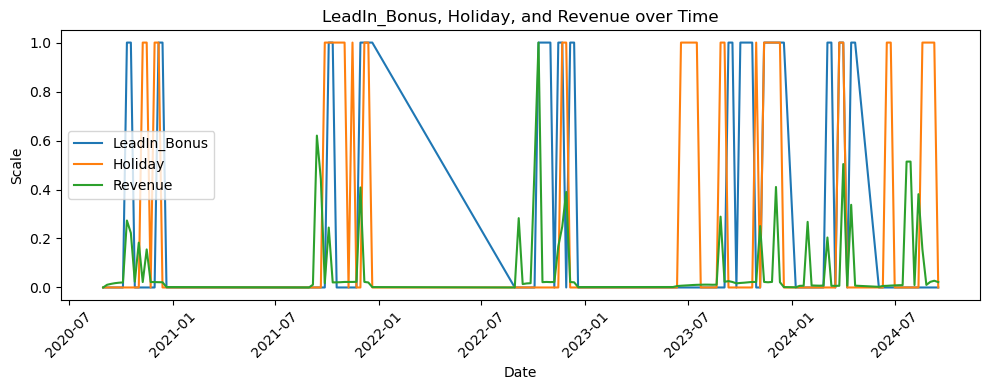

In [112]:
# Plot control (categorical) variables over time of train_df
y_series = pd.Series(y_train, name="Revenue_norm")
plot_df = df_train.copy()
plot_df["Revenue_norm"] = y_series.values

plt.figure(figsize=(10, 4))
plt.plot(plot_df["Week_Start"], plot_df["LeadIn_Bonus"], label="LeadIn_Bonus")
plt.plot(plot_df["Week_Start"], plot_df["Holiday"], label="Holiday")
plt.plot(plot_df["Week_Start"], plot_df["Revenue_norm"], label='Revenue')
plt.xlabel("Date")
plt.ylabel("Scale")
plt.title("LeadIn_Bonus, Holiday, and Revenue over Time")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

My training set split seems indicative of the full data's distributions. The spikes and seasonality displayed here don't make me confident in just a linear type of regression model. I will implement a Bayesian method below

### CASE 1: Let's build a baseline bayesian MMM using the default geometric adstock and logistic saturation functions

{'intercept': Prior("Normal", mu=0, sigma=2), 'likelihood': Prior("Normal", sigma=Prior("HalfNormal", sigma=2)), 'gamma_control': Prior("Normal", mu=0, sigma=2, dims="control"), 'gamma_fourier': Prior("Laplace", mu=0, b=1, dims="fourier_mode"), 'adstock_alpha': Prior("Beta", alpha=1, beta=3, dims="channel"), 'saturation_lam': Prior("Gamma", alpha=3, beta=1, dims="channel"), 'saturation_beta': Prior("HalfNormal", sigma=2, dims="channel")}


Sampling: [adstock_alpha, gamma_control, intercept, saturation_beta, saturation_lam, y, y_sigma]


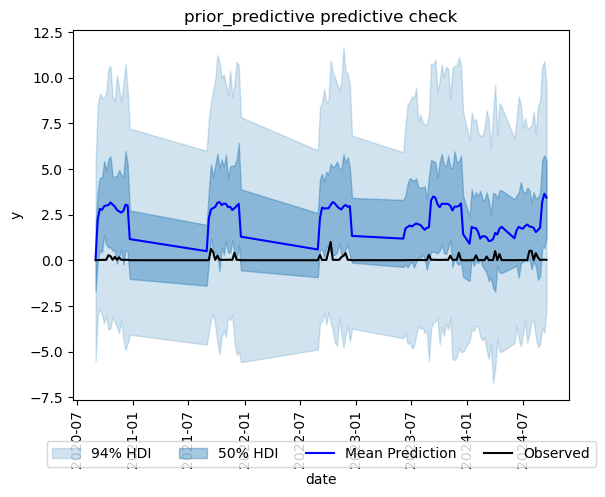

In [113]:
# Baseline MMM (no hyperparameter tuning)
mmm_base = MMM(
    date_column="Week_Start",
    channel_columns=spend_var,
    adstock=GeometricAdstock(l_max=6),
    saturation=LogisticSaturation(),
    control_columns=["LeadIn_Bonus","Holiday"]
)

# Print model configuration settings
print(mmm_base.default_model_config)

# Compute prior predictive power
mmm_base.sample_prior_predictive(df_train.reset_index(), y_train, samples=2_000)
fig, ax = plt.subplots()
mmm_base.plot_prior_predictive(ax=ax, original_scale=True)
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol=4)
plt.xticks(rotation = 90)
plt.show()

The prior predictive plot shows that the priors are reasonably informative, allowing variability that could plausibly generate the observed data. The Prior mean is slightly higher than actual data and the spread is appropriate with  HDIs wide enough to include most of the observed data. These priors won't strongly constrain the model but provide a decent start

### CASE 2: MMM with a higher decay rate for Geometric Adstock and default lambda for Saturation

In [11]:
# Determining priors
total_spend = df_train[spend_var].sum(axis=0)
spend_share = total_spend / total_spend.sum()
print(spend_share)
HALFNORMAL_SCALE = 1 / np.sqrt(1 - 2 / np.pi)
n_channels = len(spend_var)
prior_sigma = HALFNORMAL_SCALE * n_channels * spend_share.to_numpy()
prior_sigma.tolist()

Network_TV_Spend    0.343862
Cable_TV_Spend      0.312235
Digital_Spend       0.343902
dtype: float64


[1.7112969116859653, 1.553898260501285, 1.711495047723668]

Prior probabilities and spend across the three channels is generally even, not strongely favored in any specific channel. halfnormal distribution is used to calculate priors since marketing effects on rev can't be negative (only nothing or positive) and this has a scale of [0, infinity]. Since very few channels have large effects the probability density function is heaviest near 0 (most hae small effects) to regularize model and prevent overfitting ROI.

{'intercept': Prior("Normal", mu=0, sigma=2), 'likelihood': Prior("Normal", sigma=Prior("HalfNormal", sigma=2)), 'gamma_control': Prior("Normal", mu=0, sigma=2, dims="control"), 'gamma_fourier': Prior("Laplace", mu=0, b=1, dims="fourier_mode"), 'adstock_alpha': Prior("Beta", alpha=[1.2 1.1 0.7], beta=[2 3 3], dims="channel"), 'saturation_lam': Prior("Gamma", alpha=[4 3 2], beta=[1 1 1], dims="channel"), 'saturation_beta': Prior("HalfNormal", sigma=[1.71129691 1.55389826 1.71149505], dims="channel")}


Sampling: [adstock_alpha, gamma_control, gamma_fourier, intercept, saturation_beta, saturation_lam, y, y_sigma]


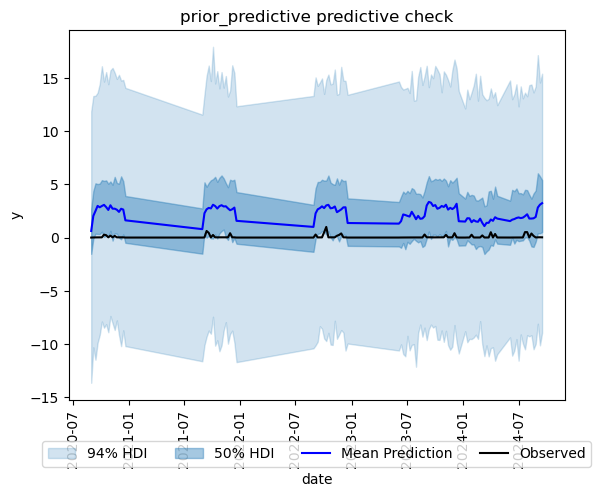

In [ ]:
#set model congifuration with our priors for each parameter. Using a smaller alpha and keeping bias towards control variables priors with a gamma control distribution
mmm_config = {
    'intercept': Prior("Normal", mu=.5, sigma=.2),
    "saturation_beta": Prior("HalfNormal", sigma=prior_sigma),
    'gamma_control': Prior("Normal", mu=0, sigma=1),
    "gamma_fourier": Prior("Laplace", mu=0, b=0.2),
    'likelihood': Prior("Normal", sigma=Prior("HalfNormal", sigma=6)),
    'adstock_alpha': Prior("Beta", alpha=[1.2, 1.1, 0.7], beta=[2, 3, 3], dims="channel"),
    'saturation_lam': Prior("Gamma", alpha=[4, 3, 2], beta=[1, 1, 1], dims="channel")
}

sampler_config= {"progressbar": True}

# building the model with geometric adstock and logistic saturation
mmm_alpha = MMM(
    model_config = mmm_config,
    sampler_config = sampler_config,
    date_column="Week_Start",
    adstock=GeometricAdstock(l_max=4),
    saturation=LogisticSaturation(),
    channel_columns=spend_var,
    control_columns=["LeadIn_Bonus","Holiday"],
    yearly_seasonality=2
)

# Print model configuration settings
print(mmm_alpha.default_model_config)

# Compute prior predictive power
mmm_alpha.sample_prior_predictive(df_train.reset_index(), y_train, samples=2_000)
fig, ax = plt.subplots()
mmm_alpha.plot_prior_predictive(ax=ax, original_scale=True)
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol=4)
plt.xticks(rotation = 90)
plt.show()

Testing using a smaller α in the Beta prior to increase the adstock decay rate, producing shorter carryover effects. This assumes advertising impacts are more short-term than before and pairs well with fast paced advertising like Digital

### CASE 3: MMM with faster decay Geometric Adstock and higher lambda for Logistic Saturation

{'intercept': Prior("Normal", mu=0, sigma=2), 'likelihood': Prior("Normal", sigma=Prior("HalfNormal", sigma=2)), 'gamma_control': Prior("Normal", mu=0, sigma=2, dims="control"), 'gamma_fourier': Prior("Laplace", mu=0, b=1, dims="fourier_mode"), 'adstock_alpha': Prior("Beta", alpha=[1.2 1.1 0.7], beta=[2 3 3], dims="channel"), 'saturation_lam': Prior("Gamma", alpha=[5 4 3], beta=[1 1 1], dims="channel"), 'saturation_beta': Prior("HalfNormal", sigma=[1.71129691 1.55389826 1.71149505], dims="channel")}


Sampling: [adstock_alpha, gamma_control, gamma_fourier, intercept, saturation_beta, saturation_lam, y, y_sigma]


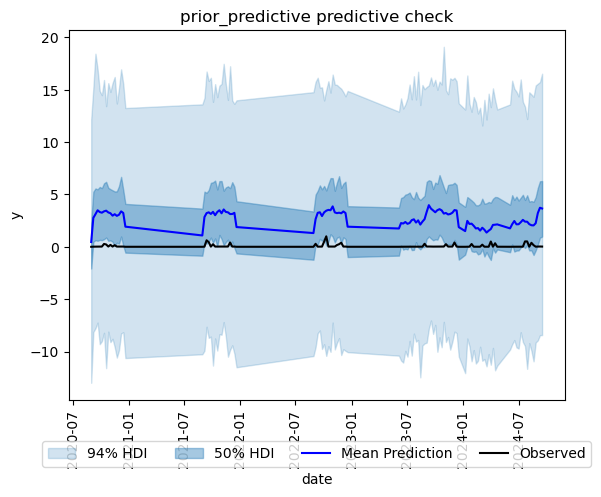

In [129]:
#set model congifuration with our priors for each parameter. Using a higher lambda
mmm_config = {
    'intercept': Prior("Normal", mu=.5, sigma=.2),
    "saturation_beta": Prior("HalfNormal", sigma=prior_sigma),
    'gamma_control': Prior("Normal", mu=0, sigma=1),
    "gamma_fourier": Prior("Laplace", mu=0, b=0.2),
    'likelihood': Prior("Normal", sigma=Prior("HalfNormal", sigma=6)),
    'adstock_alpha': Prior("Beta", alpha=[1.2, 1.1, 0.7], beta=[2, 3, 3], dims="channel"),
    'saturation_lam': Prior("Gamma", alpha=[5, 4, 3], beta=[1, 1, 1], dims="channel")
}

sampler_config= {"progressbar": True}

# building the model with geometric adstock and logistic saturation
mmm_lambda = MMM(
    model_config = mmm_config,
    sampler_config = sampler_config,
    date_column="Week_Start",
    adstock=GeometricAdstock(l_max=6),
    saturation=LogisticSaturation(),
    channel_columns=spend_var,
    control_columns=["LeadIn_Bonus","Holiday"],
    yearly_seasonality=2
)

# Print model configuration settings
print(mmm_lambda.default_model_config)

# Compute prior predictive power
mmm_lambda.sample_prior_predictive(df_train.reset_index(), y_train, samples=2_000)
fig, ax = plt.subplots()
mmm_lambda.plot_prior_predictive(ax=ax, original_scale=True)
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol=4)
plt.xticks(rotation = 90)
plt.show()

 Testing using larger lambda, meaning our marketing spend reaches its maximum potential sooner in a reasonably sharper logistic curve

In [131]:
# Fit best model and run metric checks
mmm_lambda.fit(X=df_train.reset_index(), y=y_train, target_accept=0.90, chains=4,random_seed=42)   

c:\Users\jchan12\AppData\Local\anaconda3\envs\mmm-env\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, adstock_alpha, saturation_lam, saturation_beta, gamma_control, gamma_fourier, y_sigma]


c:\Users\jchan12\AppData\Local\anaconda3\envs\mmm-env\Lib\site-packages\rich\live.py:256: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36755 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.


c:\Users\jchan12\AppData\Local\anaconda3\envs\mmm-env\Lib\site-packages\rich\live.py:256: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Inference data with groups:
	> posterior
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data
	> fit_data

Sampling: [y]


c:\Users\jchan12\AppData\Local\anaconda3\envs\mmm-env\Lib\site-packages\rich\live.py:256: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

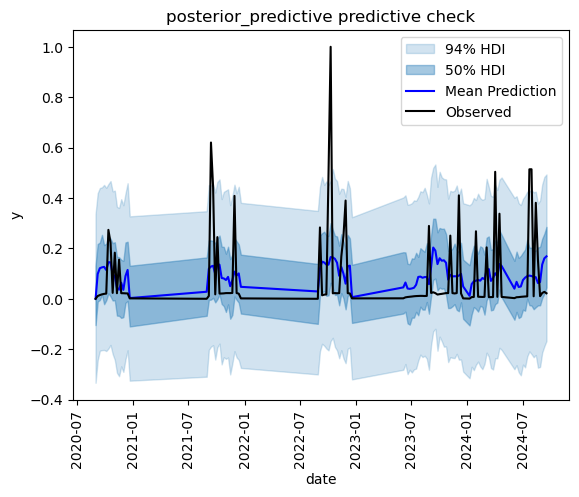

In [ ]:
# Posterior predictive fit
y_train_pred = mmm_lambda.sample_posterior_predictive(df_train.reset_index(), extend_idata=True, combined=True)
mmm_lambda.plot_posterior_predictive(original_scale=True)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Loading saved model since the fit took 10 hours
#mmm_lambda.save("mmm_lambda.nc", engine="h5netcdf")
mmm_lambda = MMM.load("mmm_lambda.nc")

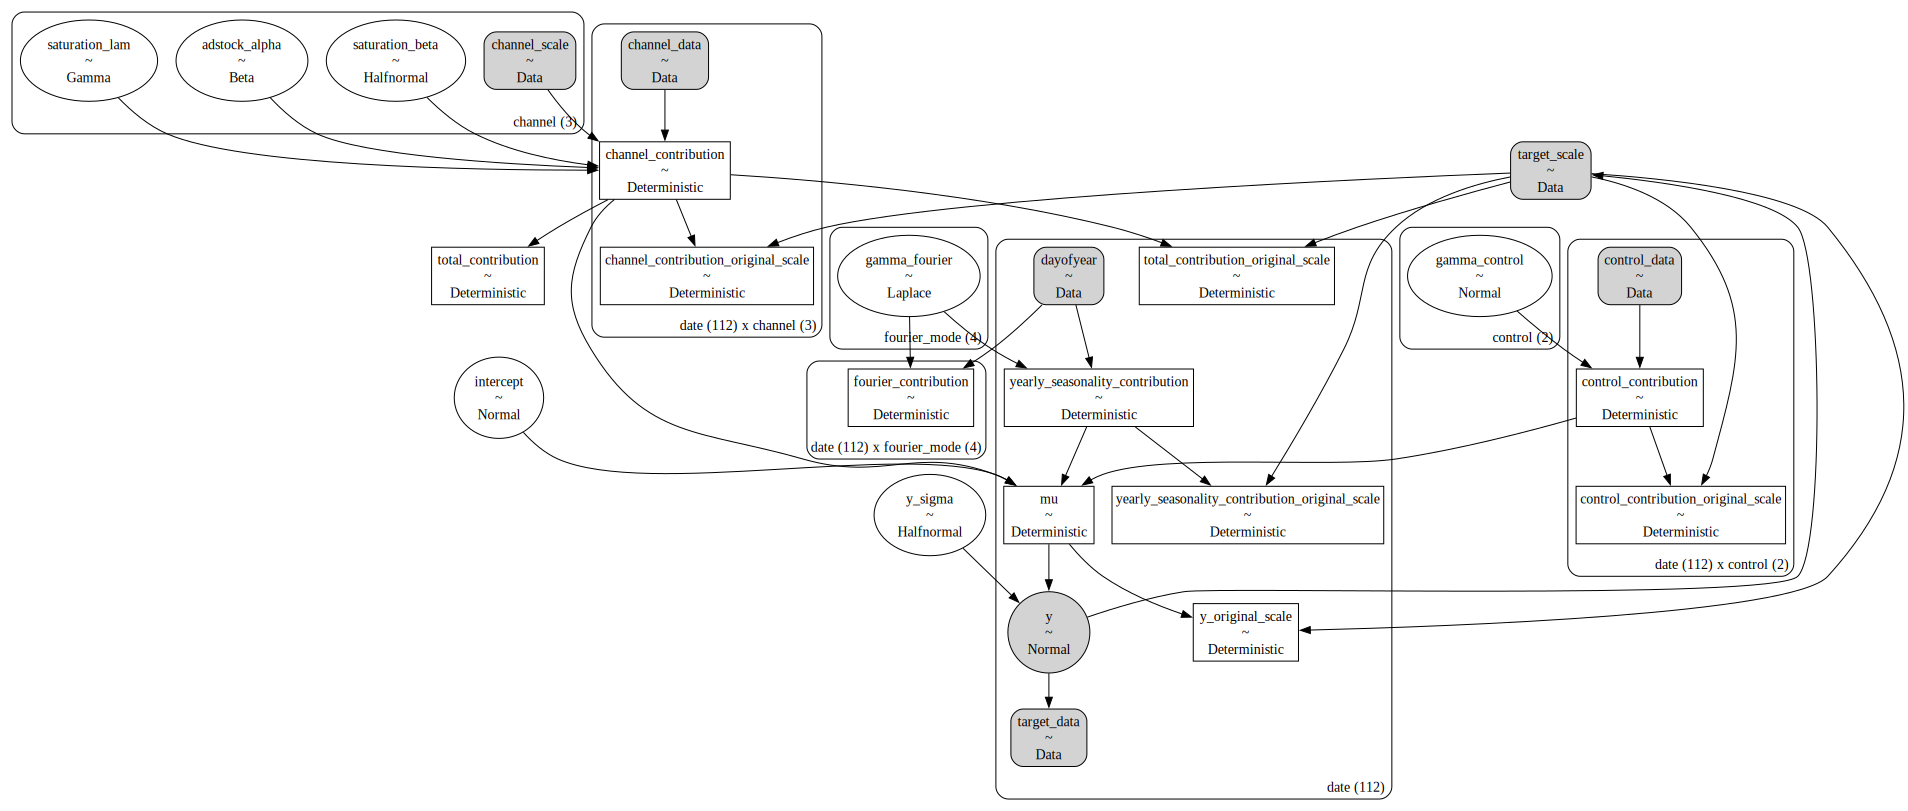

In [18]:
mmm_lambda.graphviz()

In [ ]:
# Test for divergent samples
mmm_lambda.idata["sample_stats"]["diverging"].sum().item()

4

NUTS sampler becomes unstable and doesnt follow the true posterior geometry. Some posteriors weren't sampled correctly and estimates may be biased. Can increase target_accept  to take smaller step sizes, or reparametarize weak priors

Text(0.5, 0.98, 'Model Trace')

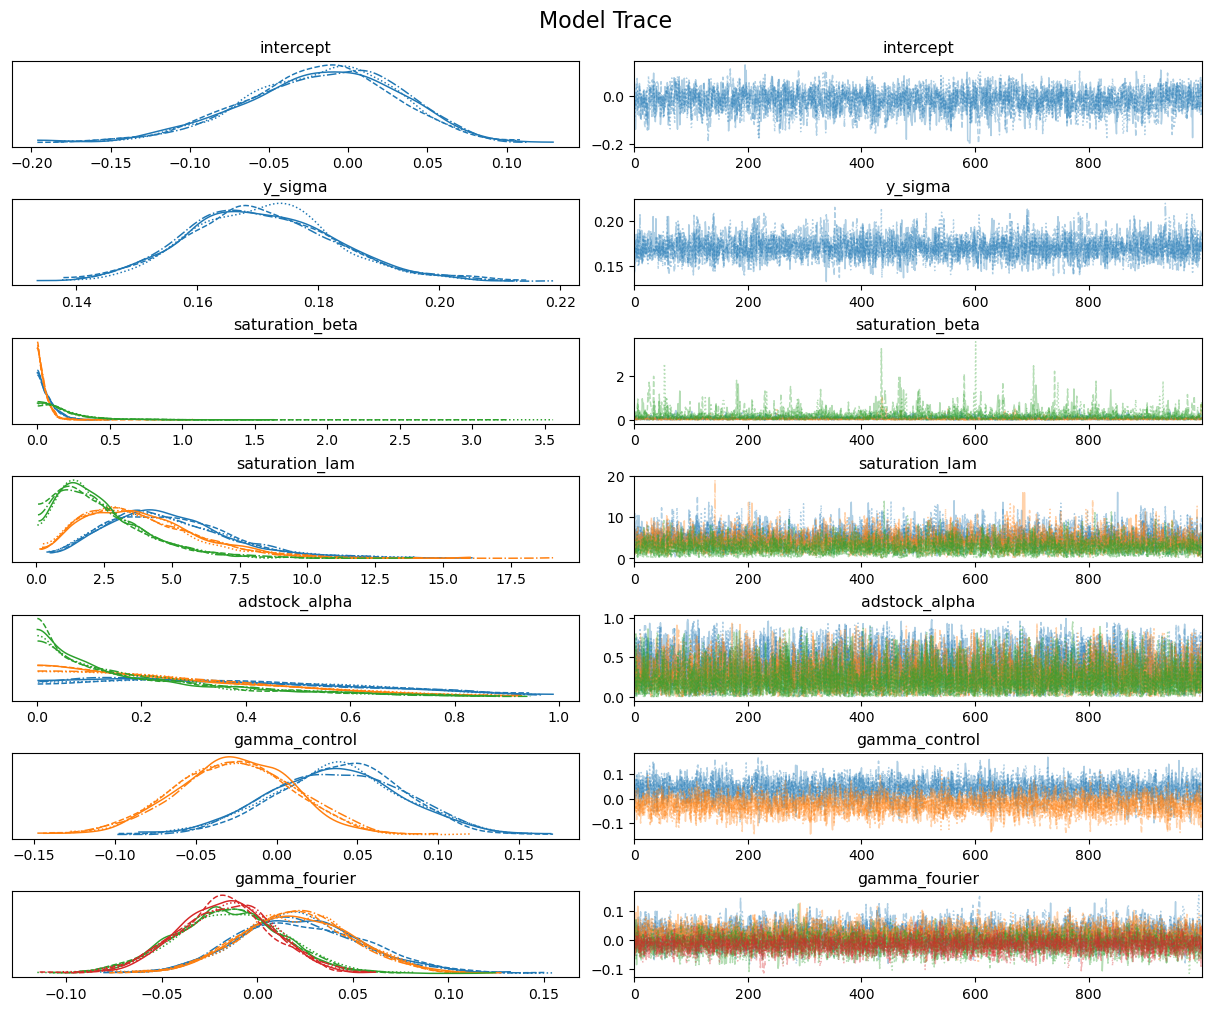

In [ ]:
_ = az.plot_trace(
    data=mmm_lambda.fit_result,
    var_names=[
        "intercept",
        "y_sigma",
        "saturation_beta",
        "saturation_lam",
        "adstock_alpha",
        "gamma_control",
        "gamma_fourier"
    ],
    compact=True,
    backend_kwargs={"figsize": (12, 10), "layout": "constrained"},
)
plt.gcf().suptitle("Model Trace", fontsize=16)

In [33]:
# Scoring model on training set
from sklearn.metrics import r2_score, root_mean_squared_error
y_train_pred = mmm_lambda.sample_posterior_predictive(df_train.reset_index(), extend_idata=True, combined=True)
y_train_pred_mean = y_train_pred['y'].mean(dim='sample').values
r_squared_training = r2_score(y_train, y_train_pred_mean)
rmse = root_mean_squared_error(y_train, y_train_pred_mean)

print('R-Squared score: ', r_squared_training)
print("RMSE (normalized revenue):", rmse)

Sampling: [y]


c:\Users\jchan12\AppData\Local\anaconda3\envs\mmm-env\Lib\site-packages\rich\live.py:256: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

R-Squared score:  0.05671935635139003
RMSE (normalized revenue): 0.1626551656150953


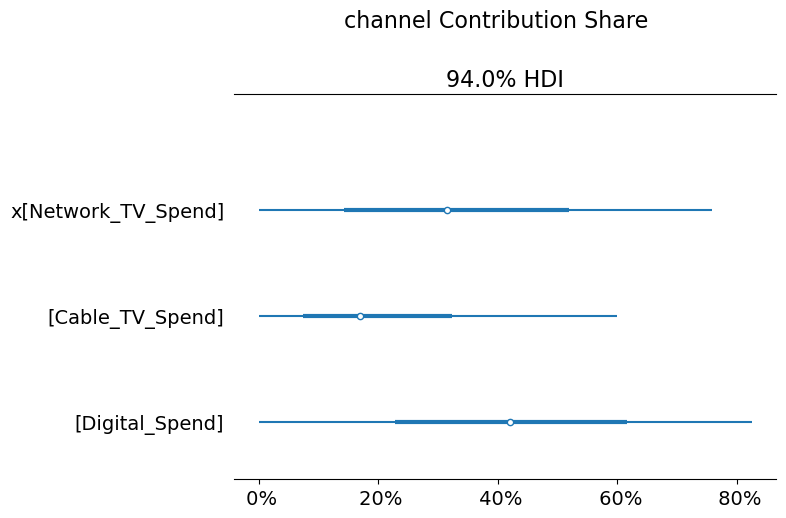

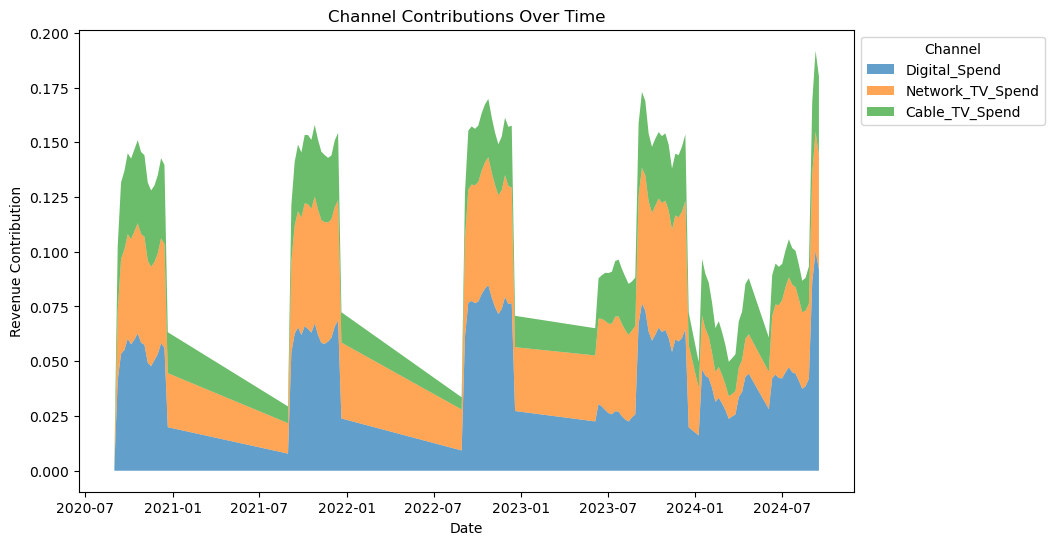

In [34]:
# Which channels are driving the most impact?
fig = mmm_lambda.plot_channel_contribution_share_hdi(figsize=(7, 5))

df_attribution = (
    mmm_lambda.compute_channel_contribution_original_scale()
    .mean(dim=('chain','draw'))
    .to_dataframe(name='attribution')
    .reset_index()
    .pivot(index='date', columns='channel', values='attribution')
    .reset_index()
    .rename_axis(None, axis=1)
)

column_order = df_attribution.drop('date', axis=1).sum(axis=0).sort_values(ascending=False).index
fig, ax = plt.subplots(figsize=(10, 6))
bottom = 0 

for channel in column_order:
    ax.fill_between(df_attribution['date'], bottom, bottom + df_attribution[channel], label=channel, alpha=0.7)
    bottom += df_attribution[channel]

plt.xlabel('Date')
plt.ylabel('Revenue Contribution')
plt.title('Channel Contributions Over Time')
plt.legend(title='Channel', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

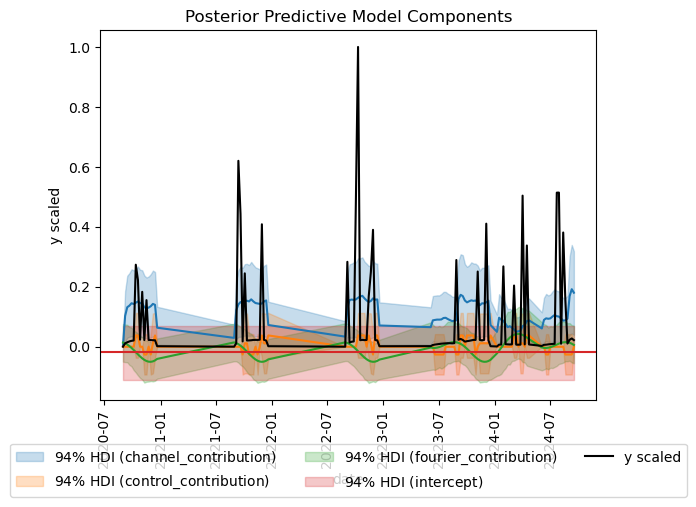

In [36]:
mmm_lambda.plot_components_contributions()
plt.xticks(rotation = 90)
plt.show()

## Optimization

Using the fitted model, simulate or recommend optimized media spend allocation to maximize revenue

Here I will establish a hypothetical budget scenario over the next quarter. I will allocate a generous delta in spending on each category for budgeting constraints, then model our actual spend vs the spend to optimize revenue

In [ ]:
# Pull the latest 12 weeks of our df_train as a historical baseline
budget_idx = slice(len(df_train) - 12, len(df_train))
recent_period = df_train[budget_idx][spend_var]

# Set budget scenario
budget = round(recent_period.sum(axis=0).sum() / 12, -3)
current_budget_split = round(recent_period.mean() / recent_period.mean().sum(), 2)
perc_change = 0.20
lower_bounds = round(recent_period.min(axis=0) * (1 - perc_change))
upper_bounds = round(recent_period.max(axis=0) * (1 + perc_change))
budget_bounds = {
    channel: [lower_bounds[channel], upper_bounds[channel]]
    for channel in spend_var
}

print(f'Overall budget constraint: {budget}')
print('Channel constraints:')
for channel, bounds in budget_bounds.items():
    print(f'  {channel}: Lower Bound = {bounds[0]}, Upper Bound = {bounds[1]}')

Overall budget constraint: 698000.0
Channel constraints:
  Network_TV_Spend: Lower Bound = 116289.0, Upper Bound = 475532.0
  Cable_TV_Spend: Lower Bound = 70825.0, Upper Bound = 612946.0
  Digital_Spend: Lower Bound = 128969.0, Upper Bound = 806841.0


C:\Users\jchan12\AppData\Local\Temp\ipykernel_21632\1943589378.py:2: DeprecationWarning: This method is deprecated and will be removed in a future version. Please migrate to the `Multidimensal.MMM` class.
  allocation_strategy, optimization_result = mmm_lambda.optimize_budget(
c:\Users\jchan12\AppData\Local\anaconda3\envs\mmm-env\Lib\site-packages\pymc_marketing\mmm\budget_optimizer.py:745: UserWarning: Using default equality constraint
  self.set_constraints(


| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  |
|-------|-------|-------|-------------|----------|----------|----------|
|   1   |   1   |   0   | -3.1114e-06 | 1.00e+00 | 1.73e-07 | 0.00e+00 |

`gtol` termination condition is satisfied.
Number of iterations: 1, function evaluations: 1, CG iterations: 0, optimality: 1.73e-07, constraint violation: 0.00e+00, execution time:  0.0 s.


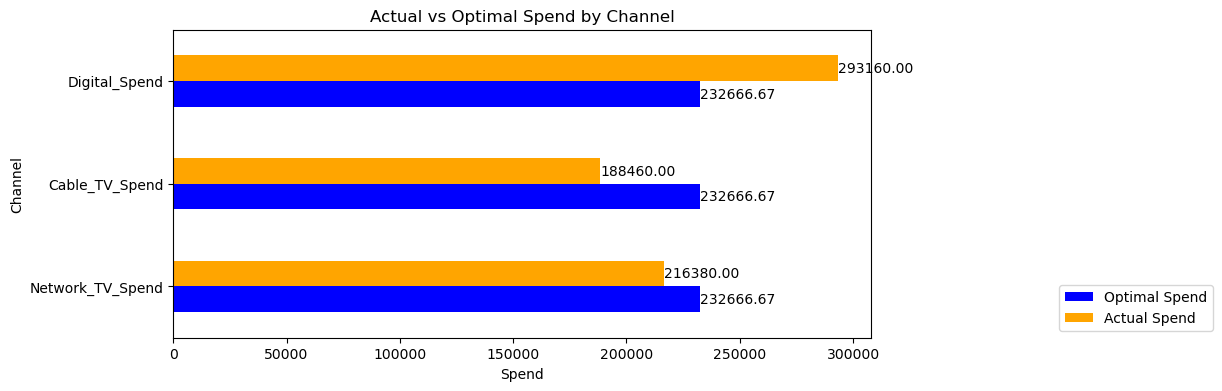

In [129]:
# Define budget model
allocation_strategy, optimization_result = mmm_lambda.optimize_budget(
    budget=budget,
    num_periods=12,
    budget_bounds=budget_bounds,
    minimize_kwargs = {
        "method": "trust-constr",
        "options": {"gtol": 1e-6, "maxiter": 5000, "verbose": 2}
    }
)

# extract optimal spend
opt_spend = pd.Series(allocation_strategy, index=recent_period.mean().index).to_frame(name="opt_spend")
opt_spend["avg_spend_historical"] = budget * current_budget_split

# plot actual vs optimal spend
fig, ax = plt.subplots(figsize=(9, 4))
opt_spend.plot(kind='barh', ax=ax, color=['blue', 'orange'])

for container in ax.containers: 
    for bar in container:
        width = bar.get_width()
        ax.text(
            width + 0.02,            
            bar.get_y() + bar.get_height()/2, 
            f"{width:.2f}",           
            va='center'
        )

plt.xlabel("Spend")
plt.ylabel("Channel")
plt.title("Actual vs Optimal Spend by Channel")
plt.legend(["Optimal Spend", "Actual Spend"], loc='lower right', bbox_to_anchor=(1.5, 0.0))
plt.show()

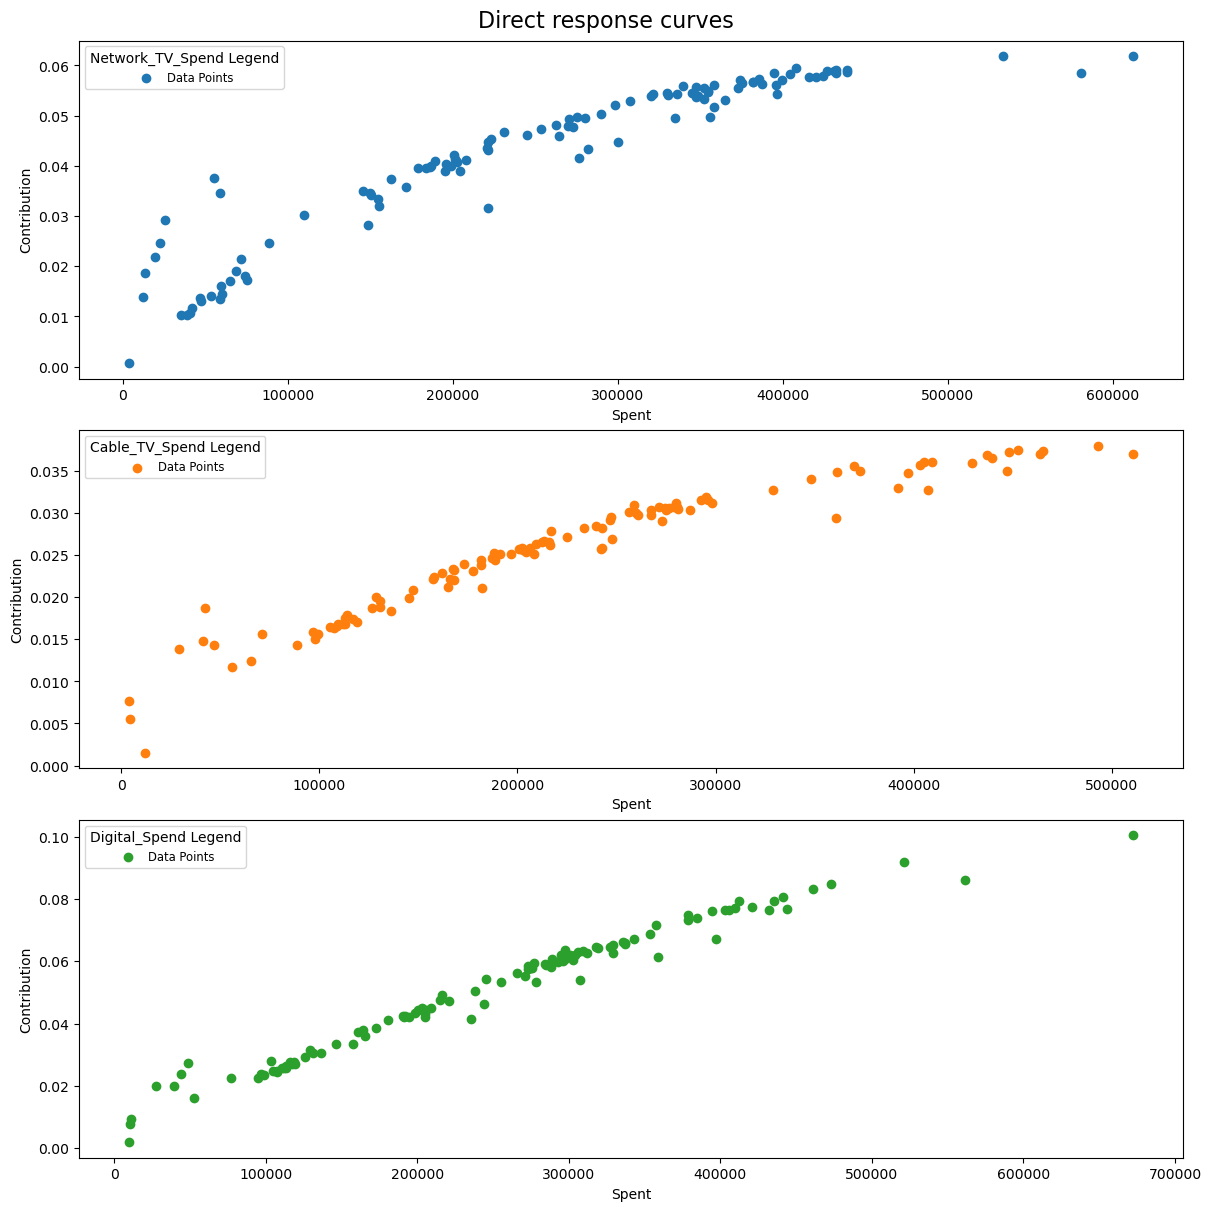

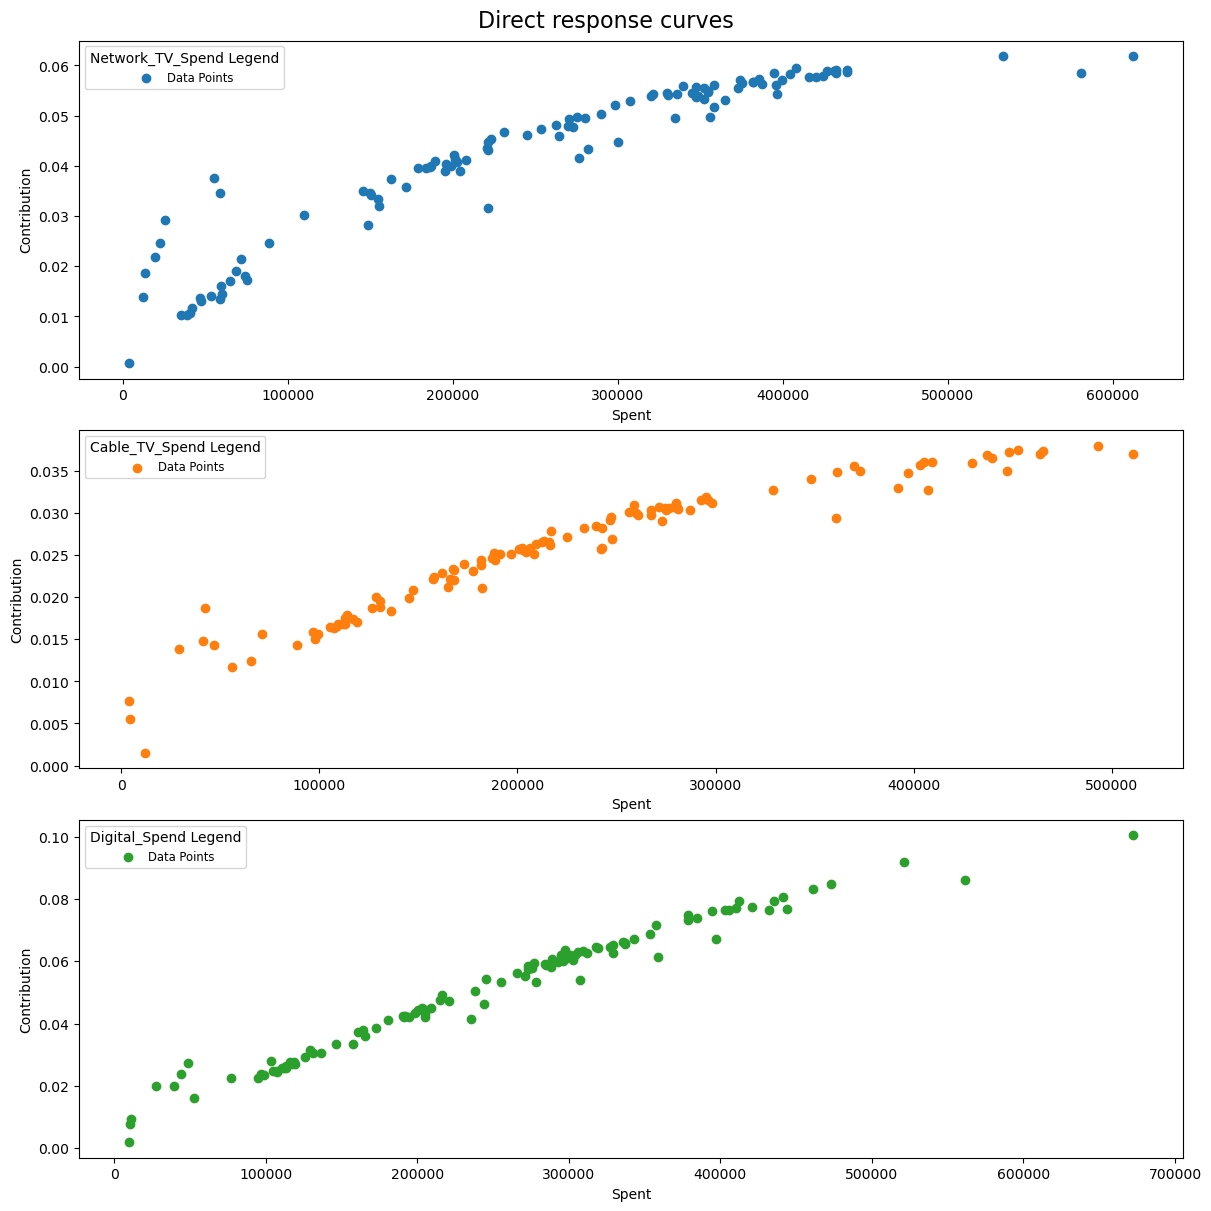

In [46]:
mmm_lambda.plot_direct_contribution_curves()

After setting a best fit model, we can see that optimal budget allocation would be to move away from Digital Spend and allocate more towards Network TV/Cable spend. Note that the optimal budget outcome is to equally allocate funds across the three channels. A possible reason this is the case is because each spend channel has reached near its maximum ROAS on its saturation curve so there is marginal return on each spend channel at this point in time. If we were to optimize budget at the start of a campaign, Network TV spend's Direct Response Curve has a more aggressive starting slope, indicating higher spend will generate higher views/revenue faster.

## Simulation

Using the fitted model, simulate and plot the impact on viewers if digital spend increases by 20% for a given period, holding other spends constant

Sampling: [y]


c:\Users\jchan12\AppData\Local\anaconda3\envs\mmm-env\Lib\site-packages\rich\live.py:256: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling: [y]


c:\Users\jchan12\AppData\Local\anaconda3\envs\mmm-env\Lib\site-packages\rich\live.py:256: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

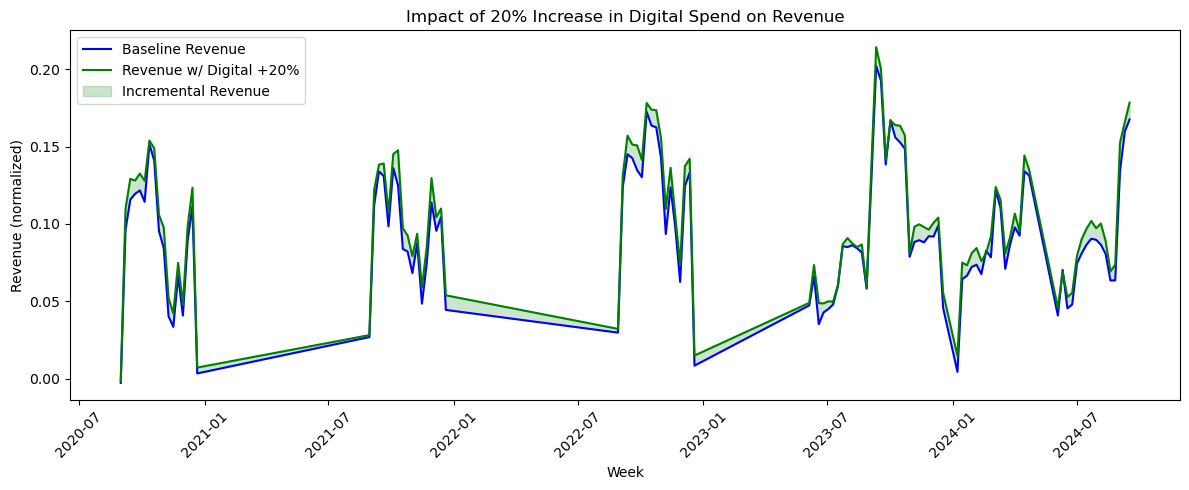

In [51]:
# Simulate 20% increase in digital spend
df_scenario = df_train.copy()
df_scenario['Digital_Spend'] = df_scenario['Digital_Spend'] * 1.2

# compute incremental impact on views (aka revenue)
y_pred_scenario = mmm_lambda.predict(df_scenario)
y_pred_baseline = mmm_lambda.predict(df_train)

incremental_effect = y_pred_scenario - y_pred_baseline
incremental_effect_original_scale = scaler.inverse_transform(incremental_effect.reshape(-1,1)).flatten() # convert back to original scale after having normalized revenue

# plot
plt.figure(figsize=(12,5))
plt.plot(df_train['Week_Start'], y_pred_baseline, label='Baseline Revenue', color='blue')
plt.plot(df_train['Week_Start'], y_pred_scenario, label='Revenue w/ Digital +20%', color='green')
plt.fill_between(df_train['Week_Start'],
                 y_pred_baseline.flatten(),
                 y_pred_scenario.flatten(),
                 color='green', alpha=0.2,
                 label='Incremental Revenue')

plt.xlabel("Week")
plt.ylabel("Revenue (normalized)")
plt.title("Impact of 20% Increase in Digital Spend on Revenue")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Interpretation and Summary

**Model Summary**

I implemented three variants of a Bayesian Marketing Mix Model (MMM):

1. A baseline model using raw media spend without parameter tuning
2. A model with a higher adstock decay rate to better capture carryover effects
3. A model with a higher logistic saturation parameter (lambda) to capture diminishing returns

The tuned models also incorporated control variables for Holidays and Lead-In effects, which proved important for explaining sudden peaks in Revenue. The final selected model achieved a training R² of 0.06 and an RMSE of 0.16 on normalized revenue (scaled from 0 to 1), indicating an average prediction error of approximately 16%. As shown in the posterior predictive checks, the model captures the timing and general pattern of seasonal spikes reasonably well but tends to underestimate their magnitude. 

A key challenge was balancing the complexity and tuning of adstock and saturation parameters against computational cost, particularly when modeling the sharp, seasonal revenue peaks. Another challenge involved a lack of a systematic method of testing different types of functions to model adstock/satuation due to the short time frame of this case study. Having the data fairly evenly distributed across the three spend channels across time made it difficult for my model to pinpoint a significant channel with better contributions and could have skewed results in budget optimization.

**Significant variables/concepts**

Adstock: Adstock(t) = XSpend(t) + 𝛼⋅Adstock(t-1). This formulation assumes that the impact of advertising in a given period reflects both the current week’s spend and a decayed portion of prior weeks’ spend, since consumers may respond with a delay after an ad showing gradually fading over time. The relevant paramater 𝛼 is the decay rate, controlling how quickly the effect of an ad fades. In my tuned MMM, I implemented a higher decay rate, effectively stating to the model that an ad effect fades quicker. This was particularly relevant to Digital Spend, where exposure and response cycles tend to be shorter and more immediate.

Saturation: Captures the diminishing returns of marketing spend: beyond a certain point, additional spend generates progressively smaller incremental gain. I chose a logistic function to measure saturation, with an increase in the variable 𝜆 indicating a steeper slope and diminishing returns set in earlier.

**Channels driving impact**

Digital Spend exhibited the highest contribution share among the three media channels and also received the largest share of historical budget. However, a simulation into budget optimization concluded that reallocating spend equally across the three channels would optimize revenue, potentially including our digital spend is historically highly saturated where additional investment yields marginal result.

**Next Steps**

1. Use the current models to design and prioritize targeted incrementality (lift) tests for key channels.
2. Evaluate the latest open-source MMM libraries, comparing these results from PyMC Marketing with Google’s Meridian as a successor to Lightweight MMM.
3. Further analyze budget allocation and response curves to identify saturation points for Digital vs. Network and validate whether future optimizers should really allocate resources evenly.
4. Experiment with custom saturation/adstock functions to test other scenarios besides geometric/logistic to capture alternating dynamics.
5. Systematic tuning of decay and saturation parameters through cross validation or other techniques.
6. Augment dataset with other control factors like genre/audience demographic/geography/competition.
7. Investigate and solve for model divergences by coding our r_hat for each adstock/saturation coefficient. We want them to be 1 meaning variance among chains is low. Fix low ESS, meaning channel coef are correlated.